# Naive Bayes

In [ ]:
import numpy as np 

class NaiveBayes:
    def __init__(self):
        pass
    
    def __call__(self, instances):
        return self.predict(instances)
    
    def fit(self, X, y):
        self.X_probas = [[0, 0] for _ in range(X.shape[1])]
        num_y0 = np.sum(y==0)
        num_y1 = np.sum(y==1)
        self.p_y = num_y1 / len(y)
        
        for instance in X[y==0]:
            for i in range(len(instance)):
                if instance[i] == 1:
                    self.X_probas[i][0] += 1

        for instance in X[y==1]:
            for i in range(len(instance)):
                if instance[i] == 1:
                    self.X_probas[i][1] += 1
        
        self.X_probas = [[elem[0] / num_y0, elem[1] / num_y1] for elem in self.X_probas]
    
    def predict(self, instances):
        preds = []
        for instance in instances:
            prob1 = 1.0
            prob0 = 1.0
            for i in range(len(instance)):
                if instance[i] == 1:
                    prob0 *= self.X_probas[i][0]
                    prob1 *= self.X_probas[i][1]
                else:
                    prob0 *= (1-self.X_probas[i][0])
                    prob1 *= (1-self.X_probas[i][1])
            prob0 *= (1 - self.p_y)
            prob1 *= self.p_y
            preds.append(int(prob1 > prob0))
                
        return np.array(preds)

## Naive Bayes Classifier

In [1]:
from Scratch.NaiveBayesClassifier import NaiveBayes

In [2]:
from Scratch.helpers.GetDatasets import classification_split
X_train, X_test, y_train, y_test = classification_split(binary_features=True)

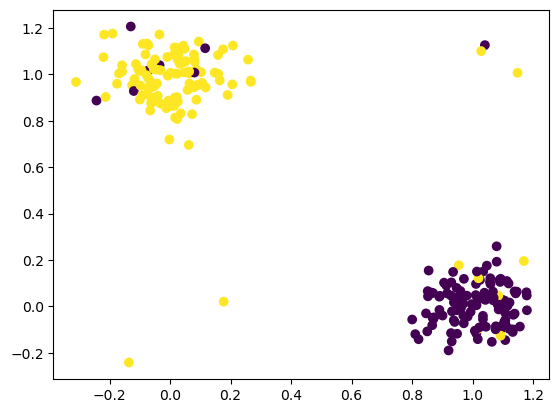

In [3]:
from Scratch.helpers.Exploration import scatter_jitter
scatter_jitter(X_train[:,0], X_train[:,1], c=y_train)

In [4]:
model = NaiveBayes()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [5]:
from Scratch.helpers.Evaluation import classification_stats
cm_args, metrics = classification_stats(preds, y_test)
metrics

{'acc': 0.9, 'precision': 0.90625, 'recall': 0.90625}

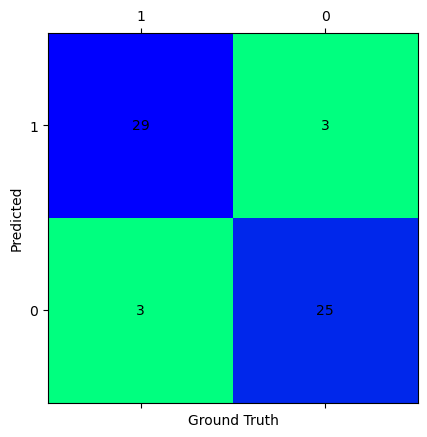

In [6]:
from Scratch.helpers.Evaluation import confusion_matrix
confusion_matrix(*cm_args)